In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

from sklearn import linear_model

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

colbrew1 = ["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6",
           "#ffffcc", "#e5d8bd", "#fddaec"]

colbrew2 = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3",
           "#fdb462", "#b3de69", "#fccde5"]

# Comparing histograms

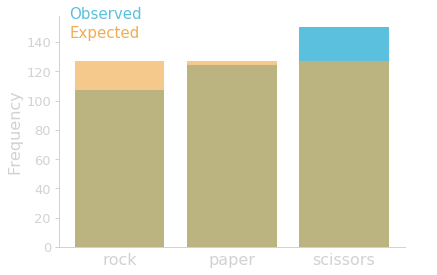

In [53]:
rps = pd.DataFrame({"rock": [107],
                    "paper": [124],
                    "scissors": [150]})

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.bar(range(3), rps[["rock", "paper", "scissors"]].values[0], color=colors["blue"], alpha=1)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", size=0, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=16, pad=6)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_xticks(range(3))
    ax.set_xticklabels((["rock", "paper", "scissors"]))
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.03, 
            ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.99,
            "Observed", size=15, color=colors["blue"], ha="left")

for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.bar(range(3), np.ones(3)*rps.values.sum()/3, color=colors["orange"], alpha=0.65)
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.03, 
            ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.91,
            "Expected", size=15, color=colors["orange"], ha="left")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/rock-paper-scissors-bars.svg", transparent=True)

# Multiple testing (wrong)

In [9]:
rps = pd.DataFrame({"rock": [107],
                    "paper": [124],
                    "scissors": [150]})

n_simul = 10000
res_flip = np.zeros(n_simul)

for i in range(n_simul):
    drawing = np.random.rand(rps.values.sum())
    res_flip[i] = np.sum(drawing<1./3)/rps.values.sum()

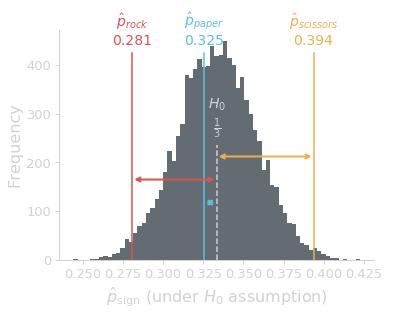

In [47]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.15, 0.73, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_flip, bins=67, color=colors["gray"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$\hat{p}_\mathrm{sign}$ (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    #ax.text(ax.get_xlim()[1]*0.01, ax.get_ylim()[1]*0.98, "10000 simulations",
    #        color=colors["blue"], size=14)
    
for ax in [ax2]:
    ax.axis("off")
    for p,col,ptext in zip(np.ravel(rps.values/rps.values.sum()), ["blue", "red", "orange"], ["$\hat{p}_{paper}$", "$\hat{p}_{rock}$", "$\hat{p}_{scissors}$" ]):
        ax.axvline(p, color=colors[col], ymax=0.9)
        ax.text(p, ax.get_ylim()[1]*0.92, f'{ptext}\n{p:.3f}', ha="center",
                color=colors[col], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    null = 1./3
    ax.axvline(null, color=colors['lightgray'], ls="--", ymax=0.5)
    ax.text(null, ax.get_ylim()[1]*0.52, r'$H_0$' "\n" r'$\frac{1}{3}$', ha="center",
                    color=colors["lightgray"], size=14, va="bottom")


for ax in [ax4]:
    ax.axis("off")
    for p,col,vpos in zip(np.ravel(rps.values/rps.values.sum()), ["blue", "red", "orange"], [0.25, 0.35, 0.45]):
        ax.annotate(s='', xy=(p,vpos), xytext=(null,vpos), 
             arrowprops=dict(arrowstyle='<->', color=colors[col],
                            linewidth=2))
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/rock-paper-scissors-simulation-multiple-testing.svg", transparent=True)

In [22]:
rps

,paper,rock,scissors
0,124,107,150


# MAD

In [4]:
def mad(data):
    data = np.ravel(data)
    return np.sum(np.abs(np.roll(data, 1)-data))/len(data)
    
original_mad = mad(rps.values/rps.values.sum())

In [6]:
rps = pd.DataFrame({"rock": [107],
                    "paper": [124],
                    "scissors": [150]})

s_rock = np.zeros(rps.values.sum())
s_rock[:int(rps.rock)] = 1
s_paper = np.zeros(rps.values.sum())
s_paper[:int(rps.paper)] = 1
s_scissors = np.zeros(rps.values.sum())
s_scissors[:int(rps.scissors)] = 1

population = np.concatenate([s_rock, s_paper, s_scissors])

n_simul=10000
res_mad = np.zeros(n_simul)

for i in range(n_simul):
    np.random.shuffle(population)
    s_rock = population[:len(s_rock)]
    s_paper = population[len(s_rock):len(s_rock)+len(s_paper)]
    s_scissors = population[len(s_rock)+len(s_paper):]
    res_mad[i] = mad([np.mean(s_rock), np.mean(s_paper), np.mean(s_scissors)])


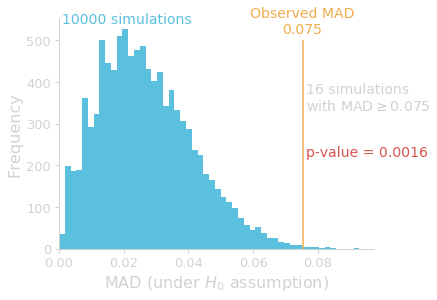

In [27]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.13, 0.15, 0.73, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_mad, bins=52, color=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("MAD (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.text(ax.get_xlim()[1]*0.01, ax.get_ylim()[1]*0.98, "10000 simulations",
            color=colors["blue"], size=14)
    
for ax in [ax2]:
    ax.axis("off")
    ax.axvline(original_mad, color=colors["orange"], ymax=0.9)
    ax.text(original_mad, ax.get_ylim()[1]*0.92, f'Observed MAD\n{original_mad:.3f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    n_above = np.sum(res_mad>original_mad)
    ax.text(original_mad+0.001, ax.get_ylim()[1]*0.6, f"{n_above} simulations\nwith MAD$\geq${original_mad:.3f}",
            color=colors["lightgray"], size=14)
    ax.text(original_mad+0.001, ax.get_ylim()[1]*0.4, f"p-value = {n_above/10000:.4f}",
            color=colors["red"], size=14)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/rock-paper-scissors-simulation-mad.svg", transparent=True)

# Simulating the null

In [61]:
rps = pd.DataFrame({"rock": [107],
                    "paper": [124],
                    "scissors": [150]})

def chisquare(observed, expected):
    return np.sum((np.array(observed)-np.array(expected))**2/np.array(expected))

n_simul = 10000
res_chi = np.zeros(n_simul)

for i in range(n_simul):
    sample = np.random.choice([0, 1, 2], size=rps.values.sum())
    s_rock = np.sum(sample==0)
    s_paper = np.sum(sample==1)
    s_scissors = np.sum(sample==2)
    res_chi[i] = chisquare([s_rock, s_paper, s_scissors], np.ones(3)*rps.values.sum()/len(rps.columns))

In [62]:
original_chi = chisquare(rps.values, np.ones(3)*rps.values.sum()/len(rps.columns))
original_chi

7.3858267716535426

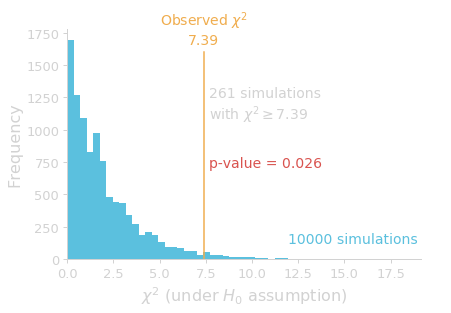

In [63]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.82, 0.8])
ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_chi, bins=52, color=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$\chi^2$ (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.text(ax.get_xlim()[1]*0.99, ax.get_ylim()[1]*0.07, "10000 simulations",
            color=colors["blue"], size=14, ha="right")
    
for ax in [ax2]:
    ax.axis("off")
    ax.axvline(original_chi, color=colors["orange"], ymax=0.9)
    ax.text(original_chi, ax.get_ylim()[1]*0.92, f'Observed $\chi^2$\n{original_chi:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    n_above = np.sum(res_chi>original_chi)
    ax.text(original_chi+0.3, ax.get_ylim()[1]*0.6, f"{n_above} simulations\nwith $\chi^2\geq${original_chi:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(original_chi+0.3, ax.get_ylim()[1]*0.4, f"p-value = {n_above/10000:.3f}",
            color=colors["red"], size=14)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/rock-paper-scissors-simulation-chi2.svg", transparent=True)

# $\chi^2$ distributions

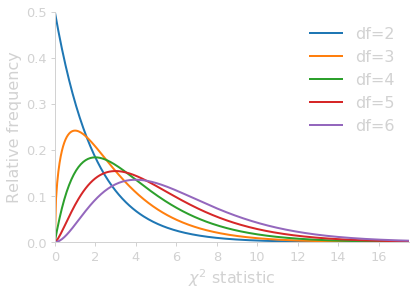

In [99]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.82, 0.8])

for ax in [ax1]:
    for df in np.arange(2, 7):
        x = np.linspace(0, 17.5, 300)
        ax.plot(x, stats.chi2.pdf(x, df), lw=2, alpha=1, label=f"df={df}")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$\chi^2$ statistic", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Relative frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0, 0.5)
    ax.set_xlim(0, 17.5)
    legend = ax.legend(loc="upper right", frameon=False, fontsize=16)
    for text in legend.get_texts():
        text.set_color(colors["lightgray"])

    
 
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/chi2-distribution.svg", transparent=True)

# Mendel's pea experiment

In [109]:
def chisquare(observed, expected):
    return np.sum((np.array(observed)-np.array(expected))**2/np.array(expected))

pea = pd.DataFrame({"ry": [315],
                    "rg": [108],
                    "wy": [101],
                    "wg": [32]})

expected = np.array([9/16, 3/16, 3/16, 1/16])*pea.values.sum()

original_chi = chisquare(pea[["ry", "rg", "wy", "wg"]].values, expected)

n_simul = 10000
res_chi = np.zeros(n_simul)

for i in range(n_simul):
    sample = np.random.choice(np.arange(len(pea.columns)), size=pea.values.sum(), p=[9/16, 3/16, 3/16, 1/16])
    observed = [np.sum(sample==i) for i in np.arange(len(pea.columns))]
    res_chi[i] = chisquare(observed, expected)

In [110]:
#np.random.choice(list_of_candidates, number_of_items_to_pick, p=probability_distribution)

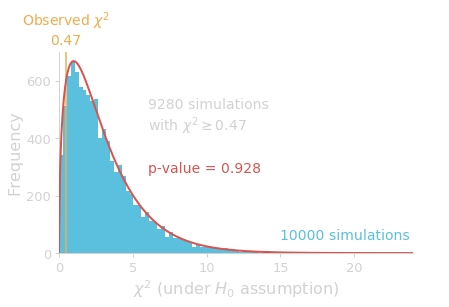

In [150]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.82, 0.7])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

for ax in [ax1]:
    ax.hist(res_chi, bins="auto", color=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$\chi^2$ (under $H_0$ assumption)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    ax.set_xlim(0, 24)
    ax.text(ax.get_xlim()[1]*0.99, ax.get_ylim()[1]*0.07, "10000 simulations",
            color=colors["blue"], size=14, ha="right")
    
for ax in [ax2]:
    ax.axis("off")
    ax.axvline(original_chi, color=colors["orange"], ymax=1)
    ax.text(original_chi, ax.get_ylim()[1]*1.02, f'Observed $\chi^2$\n{original_chi:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
        
for ax in [ax3]:
    ax.axis("off")
    n_above = np.sum(res_chi>original_chi)
    ax.text(ax.get_xlim()[1]*0.25, ax.get_ylim()[1]*0.6, f"{n_above} simulations\nwith $\chi^2\geq${original_chi:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(ax.get_xlim()[1]*0.25, ax.get_ylim()[1]*0.4, f"p-value = {n_above/10000:.3f}",
            color=colors["red"], size=14)

for ax in [ax4]:
    ax.axis("off")
    x = np.linspace(0, 25, 300)
    ax.plot(x, stats.chi2.pdf(x, df), lw=2, alpha=1, color=colors["red"], label=f"df={df}")
    ax.set_ylim(0)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/mendel-pea-simulation-chi2.svg", transparent=True)

# Theory

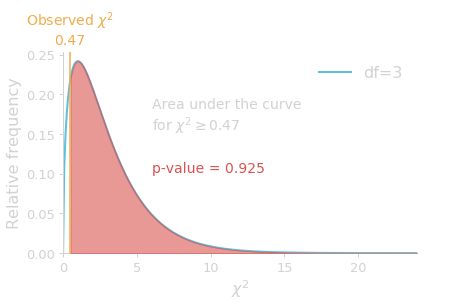

In [153]:
df=3
chi_dist = stats.chi2(df=df)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.82, 0.7])
ax2 = ax1.twinx()

for ax in [ax1]:
    x = np.linspace(0, 25, 300)
    ax.plot(x, chi_dist.pdf(x), lw=2, alpha=1, color=colors["blue"], label=f"df={df}")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel("$\chi^2$", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Relative frequency", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0)
    ax.set_xlim(0, 24)
    legend = ax.legend(loc="upper right", frameon=False, fontsize=16)
    for text in legend.get_texts():
        text.set_color(colors["lightgray"])
    
for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    pvalue = chi_dist.sf(original_chi)
    ax.axvline(original_chi, color=colors["orange"], ymax=1)
    ax.text(original_chi, ax.get_ylim()[1]*1.02, f'Observed $\chi^2$\n{original_chi:.2f}', ha="center",
        color=colors["orange"], size=14, va="bottom")
    ax.text(ax.get_xlim()[1]*0.25, ax.get_ylim()[1]*0.6, f"Area under the curve\nfor $\chi^2\geq${original_chi:.2f}",
            color=colors["lightgray"], size=14)
    ax.text(ax.get_xlim()[1]*0.25, ax.get_ylim()[1]*0.4, f"p-value = {pvalue:.3f}",
            color=colors["red"], size=14)
    ax.fill_between(x[x>original_chi], chi_dist.pdf(x)[x>original_chi], color=colors["red"], alpha=0.6)
    
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/mendel-pea-theory-chi2.svg", transparent=True)